In [1]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
dataset=load_dataset('lukebarousse/data_jobs') 

c:\Users\pheli\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
import ast
def clean_list(skill_list):
    if pd.notna(skill_list):
       return ast.literal_eval(skill_list)
df['job_skills']=df['job_skills'].apply(clean_list)

In [3]:
df_Us=df[df['job_country']== 'United States']

In [4]:
df_skills=df_Us.explode('job_skills')
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count=df_skills_count.sort_values(by='skill_count',ascending=False)

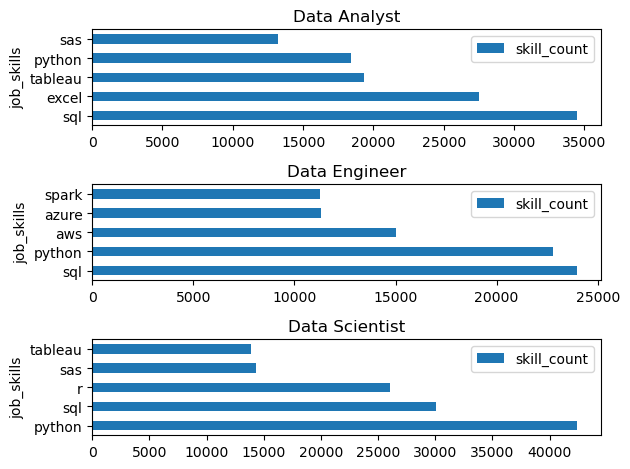

In [5]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
fig,ax=plt.subplots(len(job_titles),1)
for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i], title= job_title)
    plt.tight_layout()
    

In [6]:
df_job_title_count=df_Us['job_title_short'].value_counts().reset_index(name='jobs_total')

In [7]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [8]:
df_skills_perc['skills_percent']=df_skills_perc['skill_count']/df_skills_perc['jobs_total']*100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


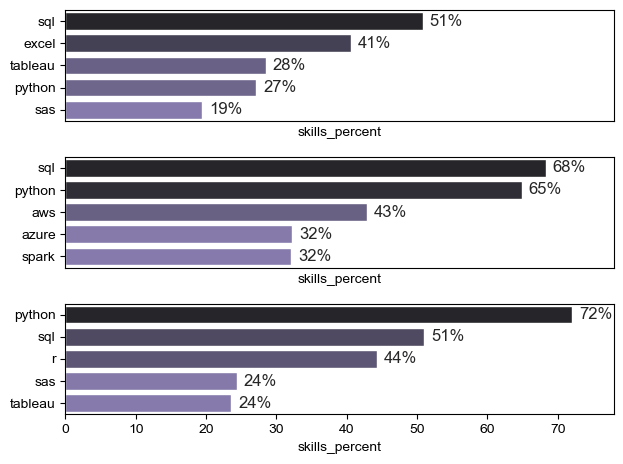

In [9]:
fig,ax=plt.subplots(len(job_titles),1)
for i, job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    # df_plot.plot(kind='barh',x='job_skills',y='skills_percent',ax=ax[i], title= job_title)
    sns.set_theme(style='ticks')
    sns.barplot(data=df_plot,x='skills_percent',y='job_skills',ax=ax[i],hue='skills_percent',palette='dark:m_r')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    for n ,v in  enumerate(df_plot['skills_percent']):
        ax[i].text(v+1,n, f'{v:.0f}%', va='center')
    if i !=len(job_titles)-1:
          ax[i].set_xticks([])

  



    plt.tight_layout()